In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

df_experiments = pd.read_csv("experiments_v01_gt.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,G-1,0.0,0.0,0.75,0.1,1440,0,0,1,GT_SLACK,0.75
1,G-2,0.0,0.0,0.75,0.2,1440,0,0,1,GT_SLACK,0.75
2,G-3,0.0,0.0,0.75,0.3,1440,0,0,1,GT_SLACK,0.75
3,G-7,0.0,0.0,0.85,0.1,1440,0,0,1,GT_SLACK,0.85
4,G-8,0.0,0.0,0.85,0.2,1440,0,0,1,GT_SLACK,0.85
5,G-9,0.0,0.0,0.85,0.3,1440,0,0,1,GT_SLACK,0.85
6,G-13,0.0,0.0,0.95,0.1,1440,0,0,1,GT_SLACK,0.95
7,G-14,0.0,0.0,0.95,0.2,1440,0,0,1,GT_SLACK,0.95
8,G-15,0.0,0.0,0.95,0.3,1440,0,0,1,GT_SLACK,0.95
9,G-19,0.0,0.0,0.75,0.1,1440,0,0,1,GT_DEVIATION,0.75


In [12]:
df_shift_dev = pd.read_csv("experiment_shift_dev_v01_gt.csv")

df_dev_mean = (
    df_shift_dev
    .groupby("Experiment_ID")["Deviation",]
    .mean()
    .round(2)  # ➜ Rundet auf 2 Nachkommastellen
    .reset_index()
    .rename(columns={"Deviation": "Deviation_Mean", "Pairs": "Pairs_Mean"})
)
df_experiments = df_experiments.merge(df_dev_mean, on="Experiment_ID", how="left")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization,Deviation_Mean
0,G-1,0.0,0.0,0.75,0.1,1440,0,0,1,GT_SLACK,0.75,59.46
1,G-2,0.0,0.0,0.75,0.2,1440,0,0,1,GT_SLACK,0.75,83.48
2,G-3,0.0,0.0,0.75,0.3,1440,0,0,1,GT_SLACK,0.75,114.01
3,G-7,0.0,0.0,0.85,0.1,1440,0,0,1,GT_SLACK,0.85,86.55
4,G-8,0.0,0.0,0.85,0.2,1440,0,0,1,GT_SLACK,0.85,102.44
5,G-9,0.0,0.0,0.85,0.3,1440,0,0,1,GT_SLACK,0.85,129.94
6,G-13,0.0,0.0,0.95,0.1,1440,0,0,1,GT_SLACK,0.95,126.46
7,G-14,0.0,0.0,0.95,0.2,1440,0,0,1,GT_SLACK,0.95,155.35
8,G-15,0.0,0.0,0.95,0.3,1440,0,0,1,GT_SLACK,0.95,182.82
9,G-19,0.0,0.0,0.75,0.1,1440,0,0,1,GT_DEVIATION,0.75,32.39


## Evaluation

In [13]:
from src.DataFrameEvaluations import plot_experiment_heatmaps_good_low,plot_experiment_boxrow, plot_experiment_lines_compare

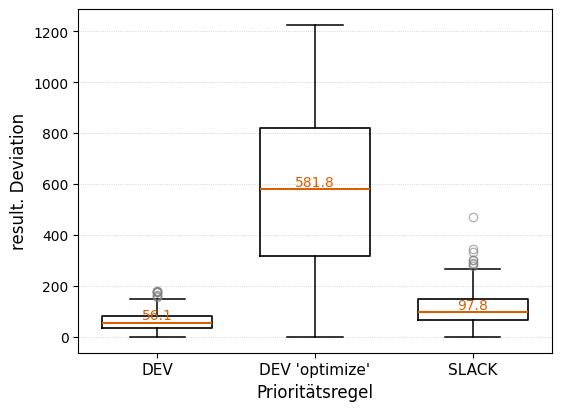

In [14]:
fig, axes = plot_experiment_boxrow(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    # optional Facetten, falls gewünscht:
    #col_col="Sim Sigma",
    value_as="result. Deviation",
    median_fmt = ".1f",
    ratio_label_on=False
)
plt.show()

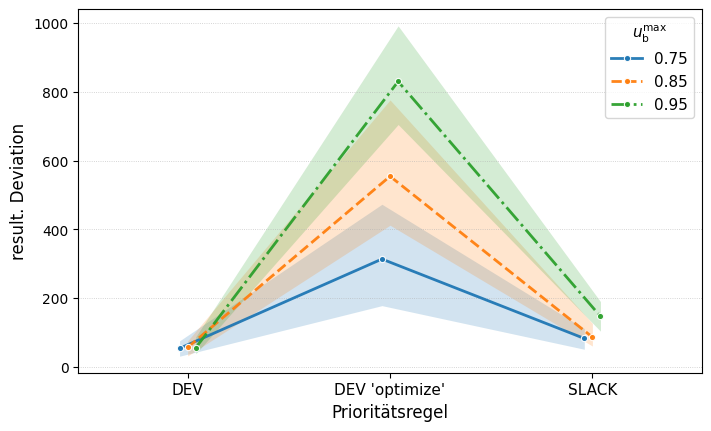

In [15]:
fig, ax = plot_experiment_lines_compare(
    df_values=df_shift_dev,
    df_meta=df_experiments,
    value_col="Deviation", value_as="result. Deviation",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    compare_col="Max Bottleneck Utilization",
    compare_col_as=r"$u_{\mathrm{b}}^{\max}$",
    agg_method="median",
    show_quantile_band=True,
    quantile_band=(0.25, 0.75),
    ratio_label_on=False
)
plt.show()

### Kendall Tau

In [19]:
from src.utils.analysis.DataFrameEvaluation import get_kendall_tau_experiment_shift_df

df_schedules = pd.read_csv("schedules_v01_gt.csv")

df_kendall = get_kendall_tau_experiment_shift_df(
    df_schedules
)
df_kendall

,Experiment_ID,Shift,Kendall_Tau
0,G-1,2,0.980000
1,G-1,3,1.000000
2,G-1,4,0.906610
3,G-1,5,0.973994
4,G-1,6,0.971717
...,...,...,...
562,G-9,18,0.866667
563,G-9,19,0.754762
564,G-9,20,0.966667
565,G-9,21,0.970303


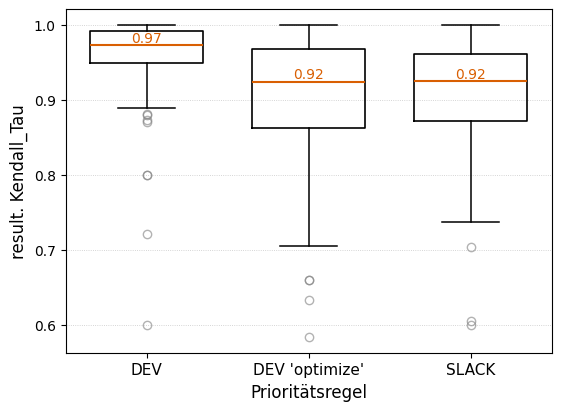

In [21]:
fig, axes = plot_experiment_boxrow(
    df_values=df_kendall,
    df_meta=df_experiments,
    value_col="Kendall_Tau",
    x_col="Experiment_Type", x_col_as= r"Prioritätsregel",
    value_as="result. Kendall_Tau",
    median_fmt = ".2f",
    ratio_label_on=False
)
plt.show()